In [11]:
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
load_dotenv()

True

In [2]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: float
    result: str

In [20]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x2 + ({state['b']})x + ({state['c']})"
    
    return {'equation': equation}

In [4]:
def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - 4*(state['a']*state['c'])
    
    return {
        'discriminant': discriminant
    }

In [ ]:
def real_roots(state: QuadState):
    root1 = ((-state['b'] + state['discriminant'])**0.5)/(2 * state['a'])
    root2 = ((-state['b'] - state['discriminant'])**0.5)/(2 * state['a'])
    
    result =  f"The roots are {root1} and {root2}"

    return {'result': result}

In [7]:
def repeated_real_roots(state: QuadState):
    root = (-state['b'])/(2 * state['a'])
    
    result =  f"The only repeating root is {root}"

    return {'result': result}

In [8]:
def no_real_roots(state: QuadState):
    
    result =  f"No real roots."

    return {'result': result}

In [ ]:
def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_real_roots', 'no_real_roots']:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return 'repeated_real_roots'
    else:
        return 'no_real_roots'

In [21]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_real_roots', repeated_real_roots)
graph.add_node('no_real_roots', no_real_roots)


graph.add_edge(START, "show_equation")
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_real_roots', END)
graph.add_edge('no_real_roots', END)


workflow = graph.compile()

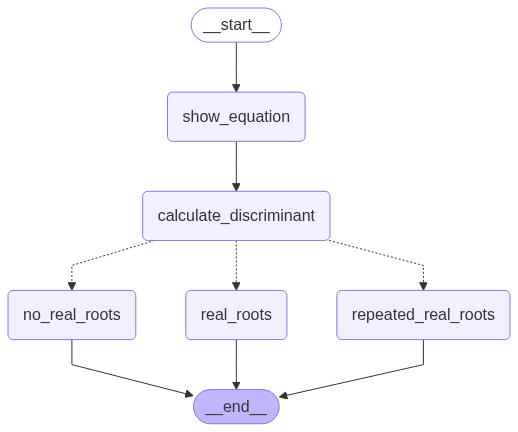

In [22]:
# visulaize the graph
from IPython.display import Image
Image(
    workflow.get_graph().draw_mermaid_png()
)

In [30]:
initial_state = {
    'a': 2,
    'b': 4,
    'c': 2
}

final_state = workflow.invoke(initial_state)

In [31]:
final_state

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x2 + (4)x + (2)',
 'discriminant': 0,
 'result': 'The only repeating root is -1.0'}